In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json file when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaidehigodbole","key":"c1941b2b987fe0675a1676dfb80cbb05"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Replace with your dataset name exactly as in Kaggle URL
!kaggle datasets download -d gti-upm/leapgestrecog


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.11G/2.13G [00:13<00:00, 274MB/s]
100% 2.13G/2.13G [00:13<00:00, 173MB/s]


In [ ]:
!unzip leapgestrecog.zip -d leapgestrecog


Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapgestrecog/leapGest

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Dataset path
data_path = '/content/leapgestrecog/leapGestRecog'

# Preprocessing
img_size = 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,354 (12.61 MB)

 Trainable params: 3,305,354 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 520s 1s/step - accuracy: 0.7832 - loss: 0.6225 - val_accuracy: 0.7452 - val_loss: 1.3803
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.9866 - loss: 0.0277 - val_accuracy: 0.7448 - val_loss: 1.2766
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 510s 1s/step - accuracy: 0.9889 - loss: 0.0225 - val_accuracy: 0.7717 - val_loss: 1.3348
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.9877 - loss: 0.0250 - val_accuracy: 0.8270 - val_loss: 0.8782
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 517s 1s/step - accuracy: 0.9885 - loss: 0.0177 - val_accuracy: 0.8455 - val_loss: 0.7145
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 520s 1s/step - accuracy: 0.9913 - loss: 0.0154 - val_accuracy: 0.8375 - val_loss: 0.8243
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.9908 - loss: 0.0150 - val_accuracy: 0.8270 - val_loss: 1.1420
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.9911 - loss: 0.0167 - val_accu

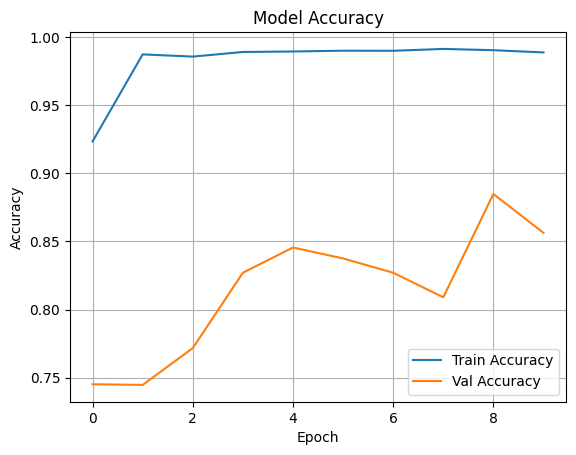

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 37s 294ms/step - accuracy: 0.8614 - loss: 0.8346
Validation Loss: 0.8561
Validation Accuracy: 0.8562


In [ ]:
# Save model in .h5 format
model.save("gesture_recognition_model.h5")


125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step


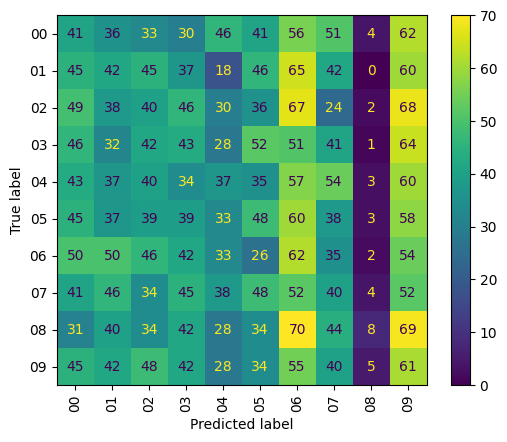

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_data.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices.keys())
disp.plot(xticks_rotation=90)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


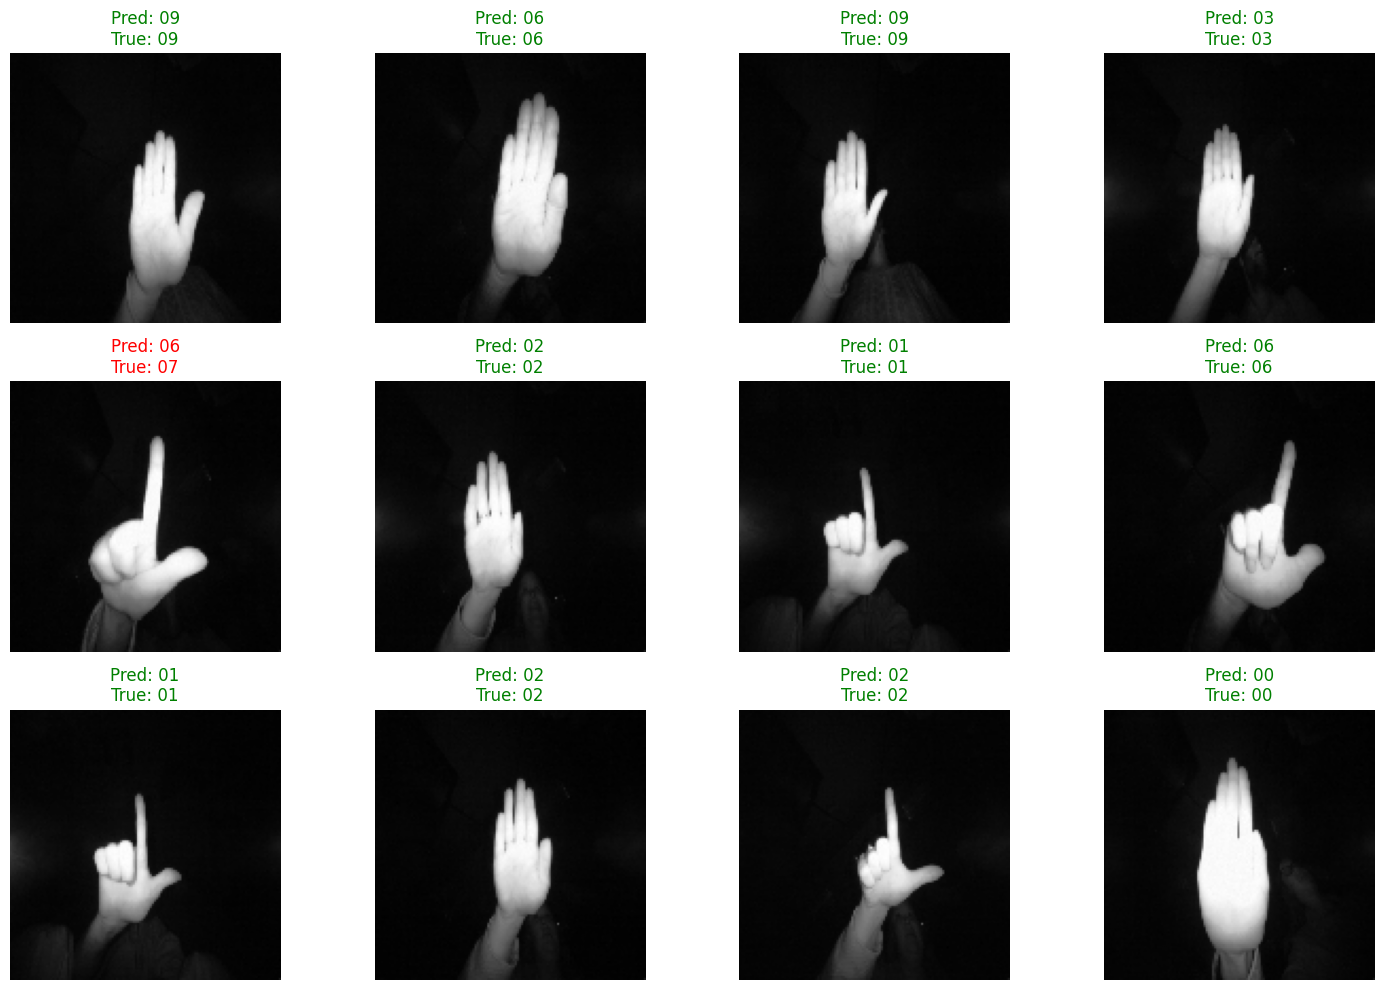

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels
class_names = list(val_data.class_indices.keys())

# Get validation images and labels
val_images, val_labels = next(iter(val_data))
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_labels, axis=1)

# Display first 12 predictions
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = val_images[i].squeeze()  # remove channel if grayscale
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color='green' if predicted_classes[i] == true_classes[i] else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 299ms/step


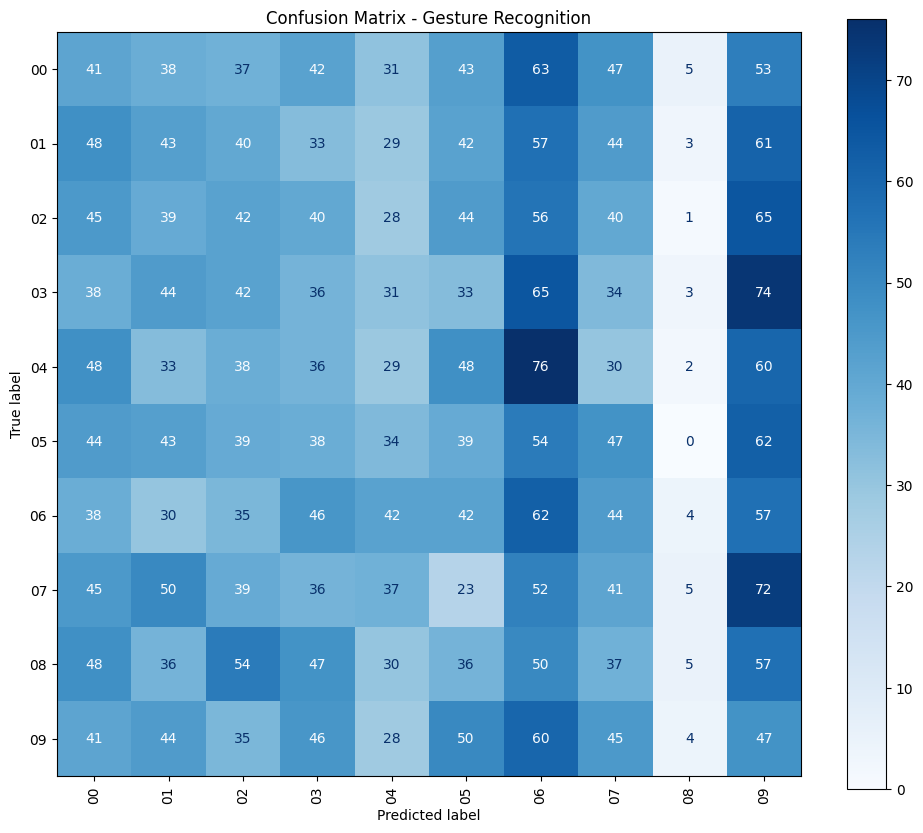

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the entire validation set
val_preds = model.predict(val_data)
y_pred_classes = np.argmax(val_preds, axis=1)
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=90)
plt.title("Confusion Matrix - Gesture Recognition")
plt.grid(False)
plt.show()


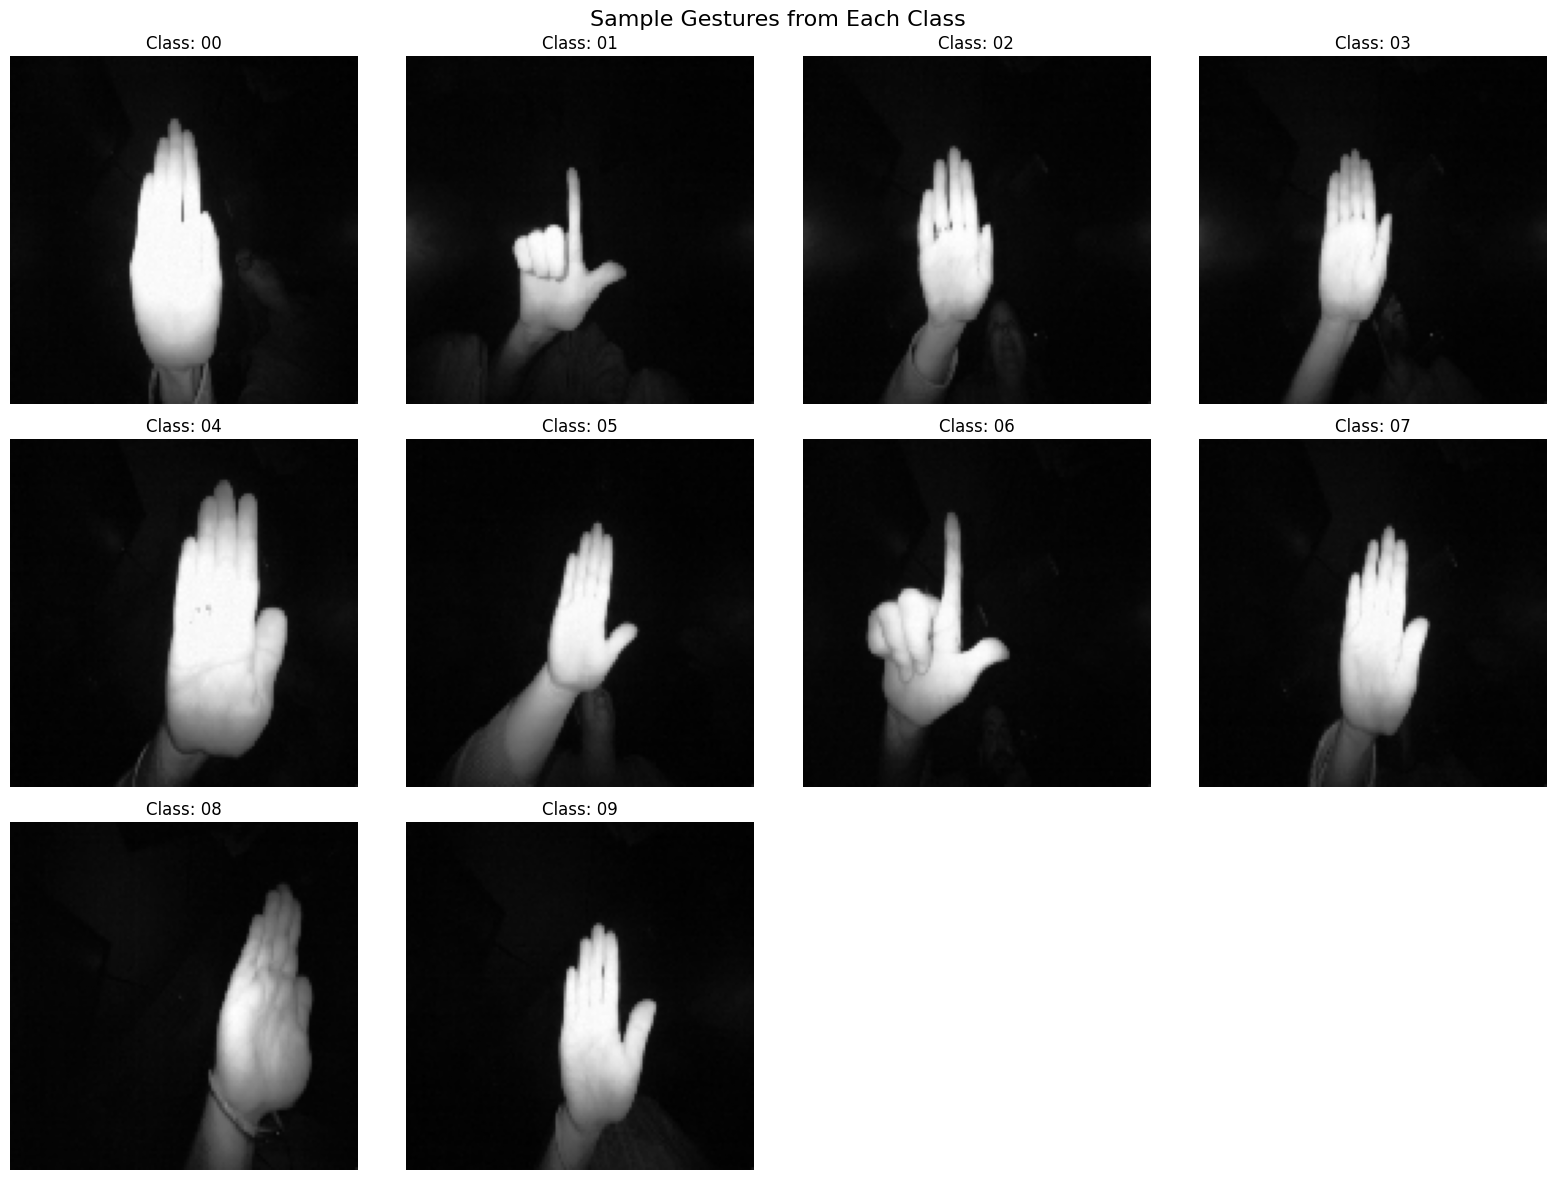

In [ ]:
import random

plt.figure(figsize=(16, 12))
for i, class_label in enumerate(class_names):
    # Get indices for the current class
    class_indices = np.where(true_classes == i)[0]
    # Pick a random image from that class
    random_idx = random.choice(class_indices)
    img = val_images[random_idx]

    plt.subplot(3, 4, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Class: {class_label}")
    plt.axis('off')

plt.suptitle("Sample Gestures from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


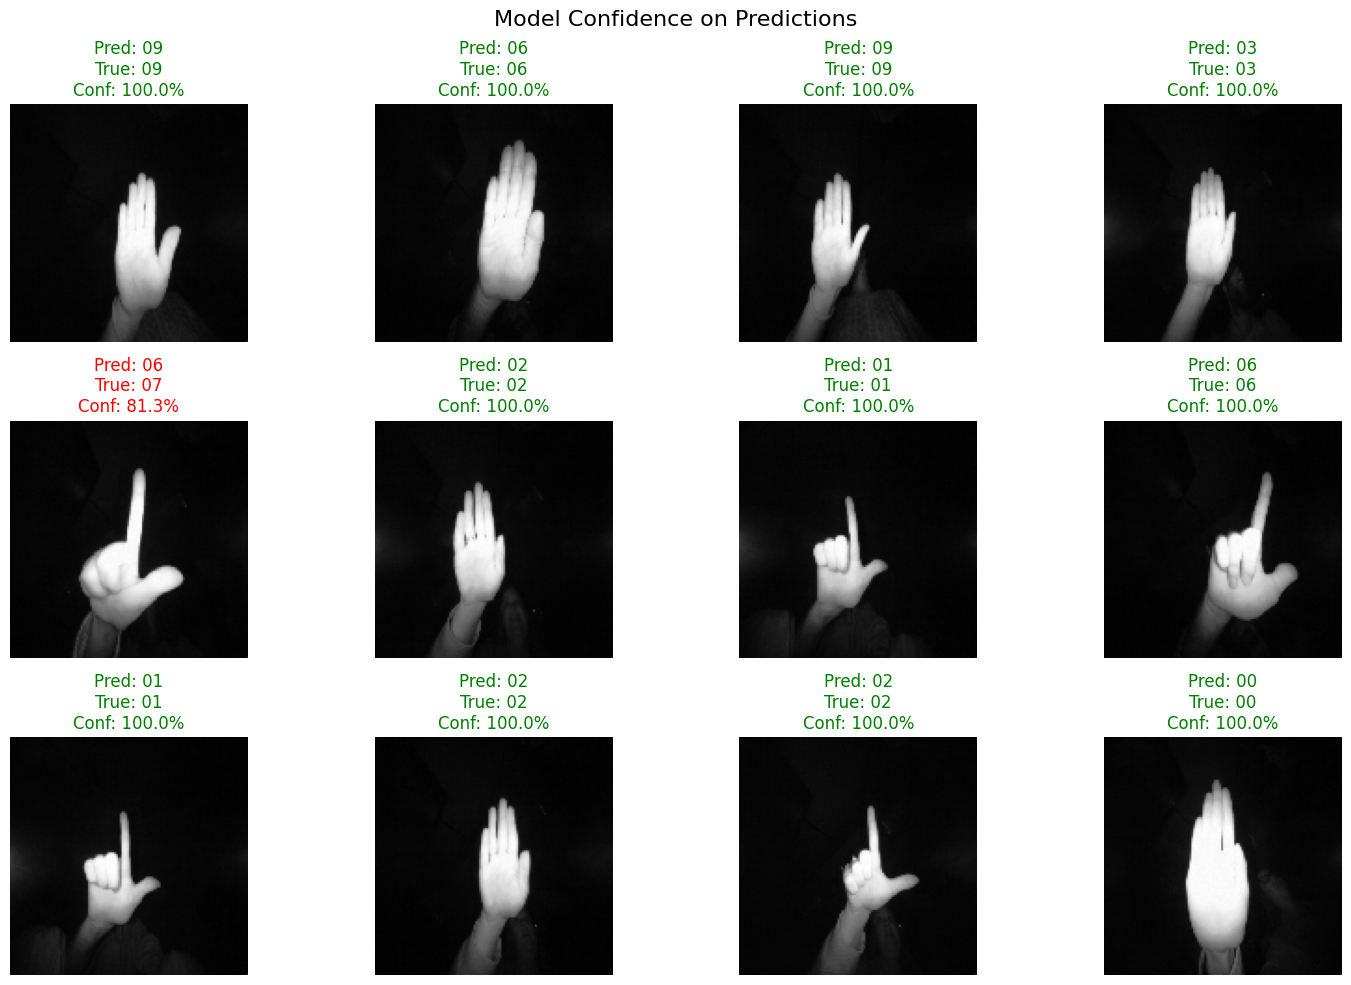

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    img = val_images[i]
    conf = np.max(predictions[i]) * 100
    pred_class = class_names[predicted_classes[i]]
    true_class = class_names[true_classes[i]]

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_class}\nTrue: {true_class}\nConf: {conf:.1f}%",
              color='green' if predicted_classes[i] == true_classes[i] else 'red')
    plt.axis('off')

plt.suptitle("Model Confidence on Predictions", fontsize=16)
plt.tight_layout()
plt.show()


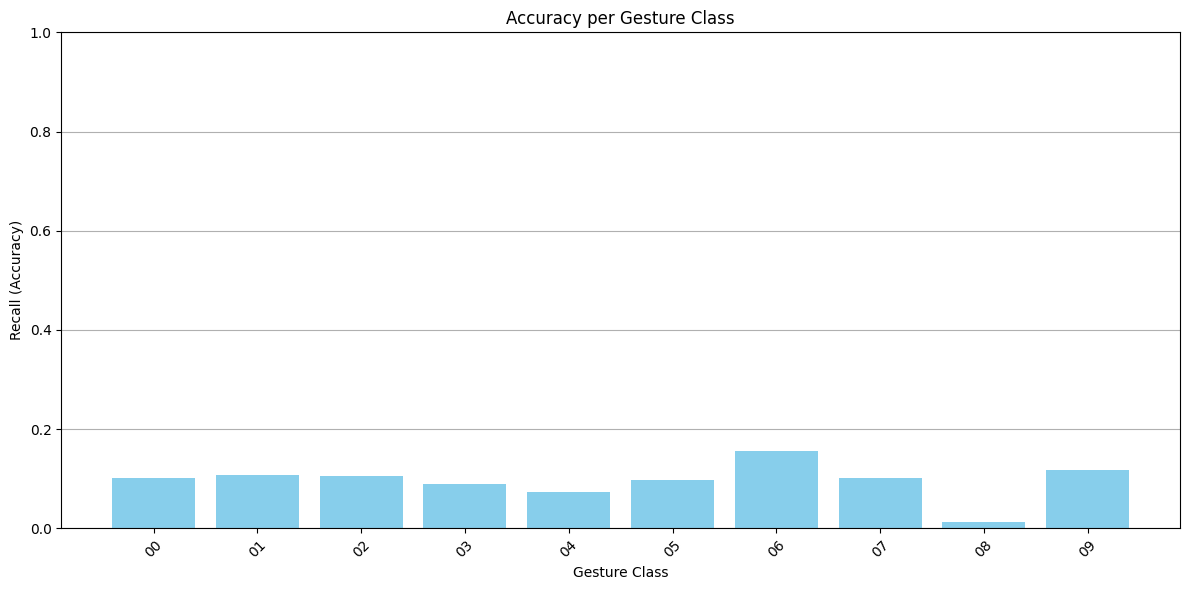

In [ ]:
from sklearn.metrics import classification_report

# Get detailed report
report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)

# Extract accuracy per class
acc_per_class = [report[label]['recall'] for label in class_names]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(class_names, acc_per_class, color='skyblue')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.title("Accuracy per Gesture Class")
plt.xlabel("Gesture Class")
plt.ylabel("Recall (Accuracy)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
